# Requirements

In [24]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd

# Configuration

In [25]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# Simple Usage

In [56]:
# Initialize the webdriver.
browser = webdriver.Chrome()

In [57]:
# Navigate to a web page.
browser.get('https://finance.yahoo.com/crypto')

In [58]:
# Print the page source code.
print(browser.page_source)

<html lang="en-US" theme="light" data-color-scheme="light" class="desktop neo-green dock-upscale"><head><script type="text/javascript" async="" src="https://static.criteo.net/js/ld/publishertag.prebid.144.js"></script><script charset="UTF-8" type="text/javascript" async="async" src="https://cdn.taboola.com/libtrc/google-topics-api.20241104-8-RELEASE.es6.js"></script><script charset="UTF-8" type="text/javascript" src="https://cdn.taboola.com/libtrc/impl.20241104-8-RELEASE.js"></script><script type="text/javascript" src="//gum.criteo.com/sync?c=72&amp;r=2&amp;j=TRC.getRTUS&amp;us_privacy=1---&amp;gdpr=0&amp;gdpr_consent=&amp;gdpr_pd="></script><script type="text/javascript" src="https://cdn.taboola.com/scripts/eid.es5.js" crossorigin="anonymous" async="async"></script><script type="text/javascript" src="https://cdn.taboola.com/scripts/cds-pips.js" crossorigin="anonymous" async="async"></script><script type="text/javascript" src="https://cdn.taboola.com/scripts/cwc.es5.js" crossorigin="an

# Laboratory Exercise - Run Mode (8 points)

In this laboratory assignment, the goal is to perform web scraping using **Selenium** on the website https://finance.yahoo.com/crypto. The task includes the extraction of **Cryptocurrency names** and their **price** and **market cap**. Following this data extraction, you will construct a data frame to organize the collected data. Finally, you are expected to generate a histogram to provide a visual representation of the distribution of the prices.

## Hints
- To navigate to a specific page with a given URL, use the `browser.get(url)` method.
- When selecting a single element, use `browser.find_element`, and for multiple elements, use `browser.find_elements`. Both of these functions take two arguments. The first specifies the attribute used to locate the element on the web page, and the second specifies the value of that attribute.
- The `By` class is used to specify which attribute is used to locate elements on a page. These are the various ways the attributes are used to locate elements on a page: `By.ID`, `By.NAME`, `By.TAG_NAME`, `BY.CLASS_NAME`, `By.CSS_SELECTOR`, etc.
- For more details, check the documentation (https://selenium-python.readthedocs.io/locating-elements.html).

## Solution

In [59]:
# Write your code here.
table_rows = browser.find_element(By.CLASS_NAME, "markets-table").find_elements(By.CLASS_NAME, 'row')
# for row in table_rows:
#     print(row.text)
crypto = dict()
row_elements = table_rows[0].find_elements(By.CLASS_NAME, 'cell')
# for el in row_elements:
#     print(el.text)
crypto['name'] = row_elements[1].text
crypto['price'] = row_elements[3].text
crypto['market-cap'] = row_elements[6].text
crypto

{'name': 'Bitcoin USD', 'price': '69,737.59', 'market-cap': '1.379T'}

In [60]:
# Add as many code boxes as you need.
crypto_list = []

for row in table_rows:
    crypto = dict()
    row_elements = row.find_elements(By.CLASS_NAME, 'cell')
    crypto['name'] = row_elements[1].text
    crypto['price'] = float(row_elements[3].text.replace(",", ""))
    crypto['market-cap'] = row_elements[6].text
    crypto_list.append(crypto)

crypto_list

[{'name': 'Bitcoin USD', 'price': 69737.59, 'market-cap': '1.379T'},
 {'name': 'Ethereum USD', 'price': 2434.64, 'market-cap': '293.172B'},
 {'name': 'Tether USDt USD', 'price': 1.0002, 'market-cap': '120.516B'},
 {'name': 'BNB USD', 'price': 566.09, 'market-cap': '81.574B'},
 {'name': 'Solana USD', 'price': 167.05, 'market-cap': '78.665B'},
 {'name': 'USD Coin USD', 'price': 1.0, 'market-cap': '35.532B'},
 {'name': 'XRP USD', 'price': 0.51446, 'market-cap': '29.257B'},
 {'name': 'Dogecoin USD', 'price': 0.172074, 'market-cap': '25.238B'},
 {'name': 'Lido Staked ETH USD', 'price': 2435.97, 'market-cap': '23.747B'},
 {'name': 'Wrapped TRON USD', 'price': 0.160204, 'market-cap': '14.006B'},
 {'name': 'TRON USD', 'price': 0.160267, 'market-cap': '13.854B'},
 {'name': 'Toncoin USD', 'price': 4.7157, 'market-cap': '11.998B'},
 {'name': 'Cardano USD', 'price': 0.334846, 'market-cap': '11.721B'},
 {'name': 'Lido wstETH USD', 'price': 2877.24, 'market-cap': '10.802B'},
 {'name': 'Shiba Inu USD

In [61]:
df = pd.DataFrame(crypto_list)
df['price'] = pd.to_numeric(df['price'], errors='coerce')  
df

,name,price,market-cap
0,Bitcoin USD,69737.590000,1.379T
1,Ethereum USD,2434.640000,293.172B
2,Tether USDt USD,1.000200,120.516B
3,BNB USD,566.090000,81.574B
4,Solana USD,167.050000,78.665B
5,USD Coin USD,1.000000,35.532B
6,XRP USD,0.514460,29.257B
7,Dogecoin USD,0.172074,25.238B
8,Lido Staked ETH USD,2435.970000,23.747B
9,Wrapped TRON USD,0.160204,14.006B


In [62]:
import matplotlib.pyplot as plt

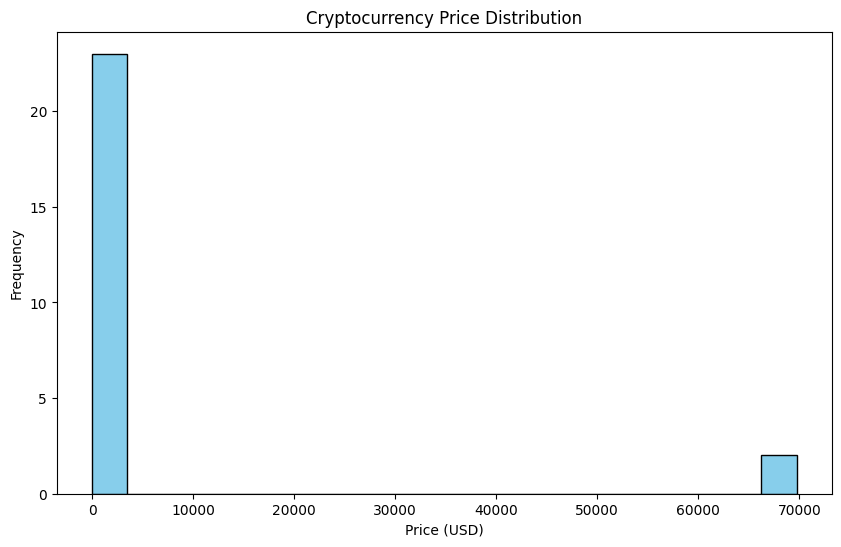

In [63]:
plt.figure(figsize=(10,6))
plt.hist(df['price'], bins=20, color='skyblue', edgecolor='black')

plt.title('Cryptocurrency Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')

plt.show()

# Laboratory Exercise - Bonus Task (+ 2 points)

The additional task involves clicking on the symbol for BTC-USD and on the new page that appears click on the **Historical data**. You will extract the prices and market caps for the BTC-USD only, and make line plot for the price data.

## Hints
- To populate an input field (`input_field`) with some `text` use `input_field.send_keys(text)`.
- To click on a specific `element` on a web page use `element.click()`.

## Solution

In [64]:
# Write your code here.
input_field = browser.find_element(By.ID, 'ybar-sbq')
input_field.send_keys("BTC-USD")

In [65]:
button = browser.find_element(By.ID, "ybar-search")
button.click()

In [71]:
historical_data_button = browser.find_element(By.CLASS_NAME, 'nav-list').find_elements(By.CLASS_NAME, 'yf-1e6z5da')[12]
historical_data_button.click()